In [1]:
import pandas as pd
import os
import random

In [2]:
file_list = os.listdir("data")

In [3]:
df_dict = {}
for file in file_list:
    name = file.split(".")[0]
    
    series = pd.read_csv(f"./data/{file}", index_col="Date", parse_dates=True,
                         infer_datetime_format=True)[" Close/Last"]
    
    series = series.str.replace("$","").astype("float")
    df_dict[name]  = series

In [4]:
df_dict

{'VSLR': Date
 2020-03-26     4.98
 2020-03-25     5.07
 2020-03-24     4.75
 2020-03-23     4.20
 2020-03-20     4.02
 2020-03-19     3.70
 2020-03-18     3.29
 2020-03-17     4.31
 2020-03-16     5.25
 2020-03-13     6.20
 2020-03-12     6.72
 2020-03-11     8.25
 2020-03-10     9.59
 2020-03-09     9.41
 2020-03-06    10.78
 2020-03-05    11.73
 2020-03-04    11.91
 2020-03-03    11.69
 2020-03-02    11.19
 2020-02-28    11.24
 2020-02-27    11.08
 2020-02-26    11.91
 2020-02-25    11.59
 2020-02-24    11.76
 2020-02-21    11.44
 2020-02-20    12.85
 2020-02-19    11.80
 2020-02-18    11.04
 2020-02-14    10.91
 2020-02-13    11.00
               ...  
 2019-05-08     7.24
 2019-05-07     6.88
 2019-05-06     6.18
 2019-05-03     5.83
 2019-05-02     5.47
 2019-05-01     5.46
 2019-04-30     5.41
 2019-04-29     5.81
 2019-04-26     5.99
 2019-04-25     5.90
 2019-04-24     5.91
 2019-04-23     5.87
 2019-04-22     5.74
 2019-04-18     5.48
 2019-04-17     5.60
 2019-04-16     5.46

In [5]:
df = pd.concat(df_dict.values(), axis="columns", join="inner")
df.columns = df_dict.keys()
df.head()

,VSLR,SEDG,RUN,FSLR,SPWR,ENPH
Date,,,,,,
2020-03-26,4.98,90.45,12.38,37.62,6.38,36.13
2020-03-25,5.07,89.90,12.16,34.79,6.67,36.81
2020-03-24,4.75,85.31,11.16,33.71,6.78,34.34
2020-03-23,4.20,69.48,9.02,33.07,6.16,27.51
2020-03-20,4.02,69.61,8.36,33.69,5.81,26.00


In [6]:
returns = df.pct_change()
returns.head()

,VSLR,SEDG,RUN,FSLR,SPWR,ENPH
Date,,,,,,
2020-03-26,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-25,0.018072,-0.006081,-0.017771,-0.075226,0.045455,0.018821
2020-03-24,-0.063116,-0.051057,-0.082237,-0.031043,0.016492,-0.067101
2020-03-23,-0.115789,-0.185559,-0.191756,-0.018985,-0.091445,-0.198893
2020-03-20,-0.042857,0.001871,-0.073171,0.018748,-0.056818,-0.054889


In [7]:
returns.describe()

,VSLR,SEDG,RUN,FSLR,SPWR,ENPH
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.001152,-0.002632,0.001461,0.001638,0.001271,-0.003772
std,0.052735,0.042951,0.043647,0.029288,0.052580,0.060528
min,-0.115789,-0.200747,-0.191756,-0.097430,-0.194904,-0.297973
25%,-0.025299,-0.019575,-0.019450,-0.014000,-0.023170,-0.030729
50%,-0.003482,-0.003343,-0.002117,-0.000866,-0.002934,-0.008476
75%,0.017671,0.014000,0.014797,0.010861,0.022163,0.017973
max,0.310030,0.194161,0.288527,0.172564,0.242733,0.342751


In [8]:
returns.corr()

,VSLR,SEDG,RUN,FSLR,SPWR,ENPH
VSLR,1.000000,0.499506,0.709869,0.514071,0.497673,0.507553
SEDG,0.499506,1.000000,0.633142,0.506530,0.582480,0.697469
RUN,0.709869,0.633142,1.000000,0.528704,0.626763,0.587845
FSLR,0.514071,0.506530,0.528704,1.000000,0.620140,0.457504
SPWR,0.497673,0.582480,0.626763,0.620140,1.000000,0.649156
ENPH,0.507553,0.697469,0.587845,0.457504,0.649156,1.000000


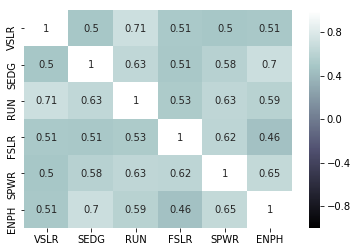

In [22]:
import seaborn as sns
sns.heatmap(returns.corr(), vmin=-1, vmax=1, cmap="bone", annot=True)

In [10]:
preweight = [random.random() for w in range(6)]
weightsum = sum(preweight)
weights = [w/weightsum for w in preweight]

In [11]:
initial = 10000
portfolio_returns = returns.dot(weights)
cumulative_returns = (1+portfolio_returns).cumprod()
cumulative_returns

Date
2020-03-26         NaN
2020-03-25    0.997996
2020-03-24    0.956702
2020-03-23    0.826524
2020-03-20    0.797630
2020-03-19    0.818798
2020-03-18    0.767161
2020-03-17    0.863025
2020-03-16    0.822117
2020-03-13    0.945325
2020-03-12    0.962870
2020-03-11    1.157112
2020-03-10    1.283498
2020-03-09    1.256300
2020-03-06    1.500037
2020-03-05    1.592251
2020-03-04    1.569052
2020-03-03    1.504351
2020-03-02    1.489872
2020-02-28    1.471532
2020-02-27    1.472880
2020-02-26    1.548340
2020-02-25    1.580087
2020-02-24    1.651845
2020-02-21    1.679735
2020-02-20    1.781980
2020-02-19    1.689519
2020-02-18    1.514633
2020-02-14    1.483835
2020-02-13    1.501578
                ...   
2019-05-08    1.091895
2019-05-07    1.111182
2019-05-06    1.035784
2019-05-03    1.031332
2019-05-02    0.992552
2019-05-01    0.994618
2019-04-30    0.977934
2019-04-29    1.032228
2019-04-26    1.038801
2019-04-25    1.025490
2019-04-24    1.023180
2019-04-23    1.014979
2019-0

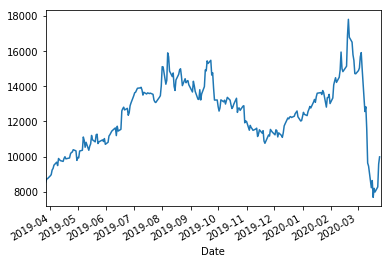

In [12]:
(initial * cumulative_returns).plot()

In [13]:
results = pd.DataFrame({
    "Weights":[],
    "Total_Return":[],
    "Risk":[],
    "Sharpe":[]
})
trials = 5000
risk_free_rate = 0.0072

for run in range(trials):
    
    
    preweight = [random.random() for w in range(6)]
    weightsum = sum(preweight)
    weights = [w/weightsum for w in preweight]
    
    initial = 10000
    portfolio_returns = returns.dot(weights)
    cumulative_returns = (1+portfolio_returns).cumprod()
    
    risk = portfolio_returns.std()
#     final_value = (initial * cumulative_returns)[-1] # in case you want this
    total_return = cumulative_returns[-1]
    
    results=results.append({
        "Weights":weights,
        "Total_Return": total_return,
        "Risk": risk,
        "Sharpe": (total_return-risk_free_rate)/risk
    }, ignore_index=True)
    
results

,Weights,Total_Return,Risk,Sharpe
0,"[0.2870870990675322, 0.2350926933565319, 0.075...",0.861672,0.037601,3.767783
1,"[0.1392670654433276, 0.09709630901049285, 0.23...",1.076945,0.035686,10.002484
2,"[0.06433986829522463, 0.20468032538725436, 0.1...",0.630116,0.042981,-2.091262
3,"[0.05133872137375452, 0.2839659808743617, 0.13...",0.863179,0.034819,4.112147
4,"[0.024892517988214284, 0.1548090781376102, 0.2...",0.852659,0.036930,3.592208
5,"[0.3152216576832562, 0.03471489957472184, 0.00...",0.730858,0.040889,0.265547
6,"[0.17156484032879227, 0.2579564713172691, 0.17...",0.897961,0.034309,5.186994
7,"[0.08692464519884345, 0.08653072094379723, 0.0...",0.774048,0.039508,1.368032
8,"[0.1316433369342595, 0.21551435214890186, 0.09...",0.684423,0.041394,-0.859474
9,"[0.16877298641023777, 0.15344764195902552, 0.1...",0.729243,0.037922,0.243740


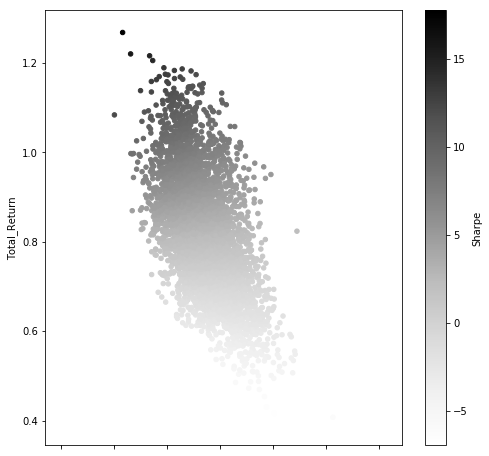

In [14]:
results.plot(kind="scatter", x="Risk", y="Total_Return", c="Sharpe", figsize=(8,8))

In [15]:
positive_yield=results[results["Total_Return"]>1]

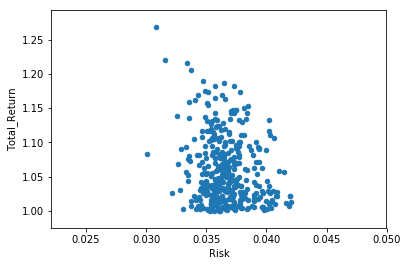

In [16]:
positive_yield.plot(kind="scatter", x="Risk", y="Total_Return")

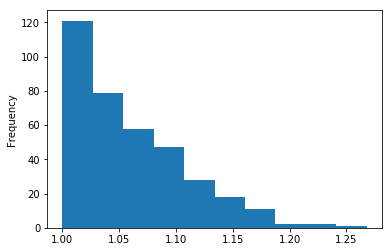

In [17]:
positive_yield["Total_Return"].plot(kind="hist")

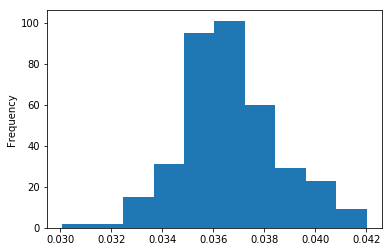

In [18]:
positive_yield["Risk"].plot(kind="hist")

In [19]:
high_sharpe = positive_yield[positive_yield["Sharpe"]>14]
high_sharpe.head()

,Weights,Total_Return,Risk,Sharpe
1738,"[0.20505016340411322, 0.002890416307861353, 0....",1.205162,0.033694,14.398959
3112,"[0.04086012000934755, 0.0029103057321554267, 0...",1.215754,0.033398,14.843616
3632,"[0.03727320898921164, 0.011345390690984633, 0....",1.267875,0.030853,17.757608
4758,"[0.10121866600487175, 0.05080738337509729, 0.2...",1.219956,0.031606,15.818340


In [20]:
high_sharpe.iloc[0]["Weights"]


[0.20505016340411322,
 0.002890416307861353,
 0.00011475581382345416,
 0.525435902461895,
 0.23934463652140264,
 0.027164125490904464]

In [21]:
high_sharpe.iloc[1]["Weights"]

[0.04086012000934755,
 0.0029103057321554267,
 0.41505186629787333,
 0.4078794278200532,
 0.099426176067467,
 0.033872104073103475]